In [1]:
import pandas as pd
import pandas as pd
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import pandas as pd
import seaborn as sns
import category_encoders as ce
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.cluster import KMeans


# from keras.utils.np_utils import to_categorical
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

# from keras.models import Sequential, load_model, Model
# from keras.applications.vgg16 import VGG16
# from keras.applications.densenet import DenseNet169, DenseNet121
# from keras.applications.resnet import ResNet50

from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
data = pd.read_csv('/kaggle/input/newimagedata/new_data.csv')


In [3]:
data = data.dropna() 


In [4]:
data.head()

,age,gender,isMarried,race,religion,priceRange,district,imagePath
0,20-25,male,False,Sinhala,Buddhism,0-2000,Colombo,1
1,20-25,male,False,Sinhala,Buddhism,0-2000,Kalutara,11
2,20-25,male,False,Tamil,Catholic,0-2000,Gampaha,17
3,20-25,male,False,Tamil,Hindu,0-2000,Kurunegala,7
4,20-25,male,False,Sinhala,Catholic,0-2000,Kurunegala,9


In [5]:
data

,age,gender,isMarried,race,religion,priceRange,district,imagePath
0,20-25,male,False,Sinhala,Buddhism,0-2000,Colombo,1
1,20-25,male,False,Sinhala,Buddhism,0-2000,Kalutara,11
2,20-25,male,False,Tamil,Catholic,0-2000,Gampaha,17
3,20-25,male,False,Tamil,Hindu,0-2000,Kurunegala,7
4,20-25,male,False,Sinhala,Catholic,0-2000,Kurunegala,9
...,...,...,...,...,...,...,...,...
14807,25-30,female,True,Tamil,Hindu,0-2000,Gampaha,23
14808,30-35,male,True,Sinhala,Catholic,2000-4000,Kandy,42
14809,25-30,female,True,Tamil,Catholic,0-2000,Gampaha,25
14810,20-25,male,True,Tamil,Hindu,0-2000,Kandy,2


In [6]:
newdata = pd.get_dummies(data,columns=[ 'age','gender','isMarried','race','religion','priceRange','district'])

In [7]:
newdata

,imagePath,age_20-25,age_25-30,age_30-35,gender_female,gender_male,isMarried_False,isMarried_True,race_Muslim,race_Sinhala,...,religion_Catholic,religion_Hindu,religion_Islam,priceRange_0-2000,priceRange_2000-4000,district_Colombo,district_Gampaha,district_Kalutara,district_Kandy,district_Kurunegala
0,1,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,11,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,17,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,7,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,9,1,0,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14807,23,0,1,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
14808,42,0,0,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,0
14809,25,0,1,0,1,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,0
14810,2,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0,1,0


In [8]:
# Identify and remove duplicate rows
df_updated = newdata.drop_duplicates()

# Reset the row index
df_updated.reset_index(drop=True, inplace=True)

# Print the DataFrame with reset index
print(df_updated)

      imagePath  age_20-25  age_25-30  age_30-35  gender_female  gender_male  \
0             1          1          0          0              0            1   
1            11          1          0          0              0            1   
2            17          1          0          0              0            1   
3             7          1          0          0              0            1   
4             9          1          0          0              0            1   
...         ...        ...        ...        ...            ...          ...   
2399         48          0          1          0              0            1   
2400         18          1          0          0              0            1   
2401         11          1          0          0              0            1   
2402         38          0          0          1              1            0   
2403          2          1          0          0              0            1   

      isMarried_False  isMarried_True  

In [10]:
df_updated.columns

Index(['imagePath', 'age_20-25', 'age_25-30', 'age_30-35', 'gender_female',
       'gender_male', 'isMarried_False', 'isMarried_True', 'race_Muslim',
       'race_Sinhala', 'race_Tamil', 'religion_Buddhism', 'religion_Catholic',
       'religion_Hindu', 'religion_Islam', 'priceRange_0-2000',
       'priceRange_2000-4000', 'district_Colombo', 'district_Gampaha',
       'district_Kalutara', 'district_Kandy', 'district_Kurunegala'],
      dtype='object')

In [9]:
df_updated.head()

,imagePath,age_20-25,age_25-30,age_30-35,gender_female,gender_male,isMarried_False,isMarried_True,race_Muslim,race_Sinhala,...,religion_Catholic,religion_Hindu,religion_Islam,priceRange_0-2000,priceRange_2000-4000,district_Colombo,district_Gampaha,district_Kalutara,district_Kandy,district_Kurunegala
0,1,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,11,1,0,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,17,1,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
3,7,1,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4,9,1,0,0,0,1,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1


In [10]:
columns_to_delete = ['priceRange_0-2000', 'priceRange_2000-4000',
       'district_Colombo', 'district_Gampaha', 'district_Kalutara',
       'district_Kandy', 'district_Kurunegala', 'age_20-25','age_25-30','age_30-35']
df_updated = df_updated.drop(columns_to_delete, axis=1)

In [11]:
df_updated.columns

Index(['imagePath', 'gender_female', 'gender_male', 'isMarried_False',
       'isMarried_True', 'race_Muslim', 'race_Sinhala', 'race_Tamil',
       'religion_Buddhism', 'religion_Catholic', 'religion_Hindu',
       'religion_Islam'],
      dtype='object')

In [12]:
columns_to_delete = ['gender_female','isMarried_False']
df_updated = df_updated.drop(columns_to_delete, axis=1)

In [13]:
df_updated.columns

Index(['imagePath', 'gender_male', 'isMarried_True', 'race_Muslim',
       'race_Sinhala', 'race_Tamil', 'religion_Buddhism', 'religion_Catholic',
       'religion_Hindu', 'religion_Islam'],
      dtype='object')

In [14]:
df_updated

,imagePath,gender_male,isMarried_True,race_Muslim,race_Sinhala,race_Tamil,religion_Buddhism,religion_Catholic,religion_Hindu,religion_Islam
0,1,1,0,0,1,0,1,0,0,0
1,11,1,0,0,1,0,1,0,0,0
2,17,1,0,0,0,1,0,1,0,0
3,7,1,0,0,0,1,0,0,1,0
4,9,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
2399,48,1,0,0,1,0,1,0,0,0
2400,18,1,1,0,1,0,0,1,0,0
2401,11,1,1,0,1,0,0,1,0,0
2402,38,0,0,0,0,1,0,1,0,0


In [15]:
batch_size = 10
total_images = df_updated.shape[0]
num_batches = total_images // batch_size

train_images = []

for batch_idx in tqdm(range(num_batches)):
    start_idx = batch_idx * batch_size
    end_idx = min((batch_idx + 1) * batch_size, total_images)  # Ensure end_idx doesn't go beyond total_images

    batch_images = []
    for i in range(start_idx, end_idx):
        img_path = '/kaggle/input/newimages2/newimages2/' + str(df_updated['imagePath'][i]) + '.jpg'
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224, 3))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255
        batch_images.append(img)

    train_images.extend(batch_images)
    print('Batch', batch_idx, 'processed')

# Process the remaining images (if any) that didn't fit into complete batches
if total_images % batch_size != 0:
    remaining_images = total_images % batch_size
    start_idx = num_batches * batch_size
    end_idx = start_idx + remaining_images

    remaining_batch = []
    for i in range(start_idx, end_idx):
        img_path = '/kaggle/input/newimages2/newimages2/' + str(df_updated['imagePath'][i]) + '.jpg'
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224, 3))
        img = tf.keras.preprocessing.image.img_to_array(img)
        img = img / 255
        remaining_batch.append(img)

    train_images.extend(remaining_batch)
    print('Remaining images processed')

X = np.array(train_images)

  0%|          | 1/240 [00:00<01:46,  2.24it/s]

Batch 0 processed


  1%|          | 2/240 [00:00<01:46,  2.23it/s]

Batch 1 processed


  1%|▏         | 3/240 [00:01<01:38,  2.42it/s]

Batch 2 processed


  2%|▏         | 5/240 [00:01<01:07,  3.51it/s]

Batch 3 processed
Batch 4 processed


  2%|▎         | 6/240 [00:01<00:55,  4.24it/s]

Batch 5 processed


  3%|▎         | 8/240 [00:02<00:46,  4.95it/s]

Batch 6 processed
Batch 7 processed


  4%|▍         | 10/240 [00:02<00:40,  5.74it/s]

Batch 8 processed
Batch 9 processed


  5%|▍         | 11/240 [00:02<00:36,  6.21it/s]

Batch 10 processed


  5%|▌         | 13/240 [00:03<00:41,  5.45it/s]

Batch 11 processed
Batch 12 processed


  6%|▋         | 15/240 [00:03<00:37,  6.00it/s]

Batch 13 processed
Batch 14 processed


  7%|▋         | 17/240 [00:03<00:43,  5.17it/s]

Batch 15 processed
Batch 16 processed


  8%|▊         | 18/240 [00:04<00:49,  4.46it/s]

Batch 17 processed
Batch 18 processed


  9%|▉         | 21/240 [00:04<00:42,  5.11it/s]

Batch 19 processed
Batch 20 processed


  9%|▉         | 22/240 [00:04<00:40,  5.44it/s]

Batch 21 processed


 10%|█         | 24/240 [00:05<00:43,  5.01it/s]

Batch 22 processed
Batch 23 processed


 11%|█         | 26/240 [00:05<00:37,  5.76it/s]

Batch 24 processed
Batch 25 processed


 12%|█▏        | 28/240 [00:05<00:31,  6.78it/s]

Batch 26 processed
Batch 27 processed


 12%|█▏        | 29/240 [00:05<00:30,  6.93it/s]

Batch 28 processed
Batch 29 processed


 13%|█▎        | 32/240 [00:06<00:27,  7.56it/s]

Batch 30 processed
Batch 31 processed


 14%|█▍        | 34/240 [00:06<00:24,  8.33it/s]

Batch 32 processed
Batch 33 processed


 15%|█▌        | 36/240 [00:06<00:22,  9.13it/s]

Batch 34 processed
Batch 35 processed


 16%|█▌        | 38/240 [00:06<00:23,  8.48it/s]

Batch 36 processed
Batch 37 processed
Batch 38 processed


 17%|█▋        | 41/240 [00:07<00:22,  8.75it/s]

Batch 39 processed
Batch 40 processed


 18%|█▊        | 43/240 [00:07<00:21,  9.02it/s]

Batch 41 processed
Batch 42 processed


 19%|█▉        | 45/240 [00:07<00:22,  8.66it/s]

Batch 43 processed
Batch 44 processed


 20%|█▉        | 47/240 [00:07<00:25,  7.56it/s]

Batch 45 processed
Batch 46 processed


 20%|██        | 49/240 [00:08<00:22,  8.31it/s]

Batch 47 processed
Batch 48 processed


 21%|██▏       | 51/240 [00:08<00:23,  8.04it/s]

Batch 49 processed
Batch 50 processed


 22%|██▏       | 53/240 [00:08<00:22,  8.22it/s]

Batch 51 processed
Batch 52 processed


 23%|██▎       | 55/240 [00:08<00:25,  7.33it/s]

Batch 53 processed
Batch 54 processed


 24%|██▍       | 57/240 [00:09<00:22,  8.15it/s]

Batch 55 processed
Batch 56 processed


 25%|██▍       | 59/240 [00:09<00:20,  8.68it/s]

Batch 57 processed
Batch 58 processed


 26%|██▌       | 62/240 [00:09<00:19,  9.27it/s]

Batch 59 processed
Batch 60 processed
Batch 61 processed


 27%|██▋       | 64/240 [00:09<00:19,  8.81it/s]

Batch 62 processed
Batch 63 processed


 28%|██▊       | 66/240 [00:10<00:17,  9.70it/s]

Batch 64 processed
Batch 65 processed
Batch 66 processed


 29%|██▉       | 69/240 [00:10<00:21,  7.78it/s]

Batch 67 processed
Batch 68 processed


 30%|██▉       | 71/240 [00:10<00:24,  6.90it/s]

Batch 69 processed
Batch 70 processed


 30%|███       | 73/240 [00:11<00:22,  7.50it/s]

Batch 71 processed
Batch 72 processed
Batch 73 processed


 32%|███▏      | 76/240 [00:11<00:18,  8.76it/s]

Batch 74 processed
Batch 75 processed


 32%|███▎      | 78/240 [00:11<00:19,  8.29it/s]

Batch 76 processed
Batch 77 processed


 33%|███▎      | 80/240 [00:12<00:23,  6.72it/s]

Batch 78 processed
Batch 79 processed


 34%|███▍      | 82/240 [00:12<00:23,  6.71it/s]

Batch 80 processed
Batch 81 processed


 35%|███▌      | 84/240 [00:12<00:27,  5.65it/s]

Batch 82 processed
Batch 83 processed


 36%|███▌      | 86/240 [00:13<00:23,  6.62it/s]

Batch 84 processed
Batch 85 processed


 37%|███▋      | 88/240 [00:13<00:23,  6.47it/s]

Batch 86 processed
Batch 87 processed


 37%|███▋      | 89/240 [00:13<00:21,  7.15it/s]

Batch 88 processed
Batch 89 processed


 38%|███▊      | 92/240 [00:13<00:20,  7.22it/s]

Batch 90 processed
Batch 91 processed


 39%|███▉      | 94/240 [00:14<00:18,  7.91it/s]

Batch 92 processed
Batch 93 processed


 40%|████      | 96/240 [00:14<00:21,  6.71it/s]

Batch 94 processed
Batch 95 processed


 40%|████      | 97/240 [00:14<00:19,  7.16it/s]

Batch 96 processed


 41%|████      | 98/240 [00:14<00:23,  6.17it/s]

Batch 97 processed


 42%|████▏     | 101/240 [00:15<00:20,  6.71it/s]

Batch 98 processed
Batch 99 processed
Batch 100 processed


 43%|████▎     | 103/240 [00:15<00:19,  7.14it/s]

Batch 101 processed
Batch 102 processed


 44%|████▍     | 105/240 [00:15<00:18,  7.44it/s]

Batch 103 processed
Batch 104 processed


 45%|████▍     | 107/240 [00:16<00:18,  7.19it/s]

Batch 105 processed
Batch 106 processed


 45%|████▌     | 109/240 [00:16<00:17,  7.38it/s]

Batch 107 processed
Batch 108 processed


 46%|████▋     | 111/240 [00:16<00:19,  6.49it/s]

Batch 109 processed
Batch 110 processed


 47%|████▋     | 113/240 [00:16<00:20,  6.22it/s]

Batch 111 processed
Batch 112 processed
Batch 113 processed


 48%|████▊     | 116/240 [00:17<00:20,  5.96it/s]

Batch 114 processed
Batch 115 processed


 49%|████▉     | 118/240 [00:17<00:19,  6.11it/s]

Batch 116 processed
Batch 117 processed


 50%|█████     | 120/240 [00:18<00:18,  6.56it/s]

Batch 118 processed
Batch 119 processed


 51%|█████     | 122/240 [00:18<00:17,  6.72it/s]

Batch 120 processed
Batch 121 processed


 51%|█████▏    | 123/240 [00:18<00:19,  5.95it/s]

Batch 122 processed


 52%|█████▏    | 124/240 [00:18<00:21,  5.51it/s]

Batch 123 processed
Batch 124 processed


 52%|█████▎    | 126/240 [00:19<00:16,  6.74it/s]

Batch 125 processed


 53%|█████▎    | 128/240 [00:19<00:18,  5.95it/s]

Batch 126 processed
Batch 127 processed


 54%|█████▍    | 129/240 [00:19<00:16,  6.67it/s]

Batch 128 processed


 55%|█████▍    | 131/240 [00:19<00:17,  6.17it/s]

Batch 129 processed
Batch 130 processed


 55%|█████▌    | 133/240 [00:20<00:16,  6.44it/s]

Batch 131 processed
Batch 132 processed


 56%|█████▌    | 134/240 [00:20<00:16,  6.34it/s]

Batch 133 processed
Batch 134 processed


 57%|█████▋    | 136/240 [00:20<00:18,  5.70it/s]

Batch 135 processed


 57%|█████▋    | 137/240 [00:21<00:20,  5.13it/s]

Batch 136 processed


 58%|█████▊    | 139/240 [00:21<00:18,  5.46it/s]

Batch 137 processed
Batch 138 processed


 59%|█████▉    | 141/240 [00:21<00:16,  5.99it/s]

Batch 139 processed
Batch 140 processed


 59%|█████▉    | 142/240 [00:21<00:15,  6.32it/s]

Batch 141 processed
Batch 142 processed


 60%|██████    | 145/240 [00:22<00:13,  6.86it/s]

Batch 143 processed
Batch 144 processed


 61%|██████▏   | 147/240 [00:22<00:14,  6.34it/s]

Batch 145 processed
Batch 146 processed


 62%|██████▏   | 149/240 [00:22<00:15,  5.82it/s]

Batch 147 processed
Batch 148 processed


 62%|██████▎   | 150/240 [00:23<00:13,  6.46it/s]

Batch 149 processed
Batch 150 processed


 63%|██████▎   | 152/240 [00:23<00:14,  5.95it/s]

Batch 151 processed
Batch 152 processed


 65%|██████▍   | 155/240 [00:23<00:12,  6.75it/s]

Batch 153 processed
Batch 154 processed


 65%|██████▌   | 156/240 [00:23<00:11,  7.20it/s]

Batch 155 processed
Batch 156 processed


 66%|██████▋   | 159/240 [00:24<00:11,  7.29it/s]

Batch 157 processed
Batch 158 processed


 67%|██████▋   | 161/240 [00:24<00:11,  7.10it/s]

Batch 159 processed
Batch 160 processed


 68%|██████▊   | 163/240 [00:24<00:11,  6.68it/s]

Batch 161 processed
Batch 162 processed


 69%|██████▉   | 165/240 [00:25<00:11,  6.63it/s]

Batch 163 processed
Batch 164 processed


 70%|██████▉   | 167/240 [00:25<00:11,  6.47it/s]

Batch 165 processed
Batch 166 processed


 70%|███████   | 169/240 [00:25<00:11,  6.06it/s]

Batch 167 processed
Batch 168 processed


 71%|███████   | 170/240 [00:26<00:10,  6.54it/s]

Batch 169 processed
Batch 170 processed


 72%|███████▏  | 173/240 [00:26<00:10,  6.61it/s]

Batch 171 processed
Batch 172 processed


 73%|███████▎  | 175/240 [00:26<00:10,  6.39it/s]

Batch 173 processed
Batch 174 processed


 74%|███████▍  | 177/240 [00:27<00:09,  6.75it/s]

Batch 175 processed
Batch 176 processed


 75%|███████▍  | 179/240 [00:27<00:10,  5.84it/s]

Batch 177 processed
Batch 178 processed


 75%|███████▌  | 180/240 [00:27<00:09,  6.26it/s]

Batch 179 processed
Batch 180 processed


 76%|███████▌  | 182/240 [00:27<00:07,  7.42it/s]

Batch 181 processed


 77%|███████▋  | 184/240 [00:28<00:08,  6.27it/s]

Batch 182 processed
Batch 183 processed


 78%|███████▊  | 186/240 [00:28<00:08,  6.74it/s]

Batch 184 processed
Batch 185 processed


 78%|███████▊  | 188/240 [00:28<00:07,  7.34it/s]

Batch 186 processed
Batch 187 processed


 79%|███████▉  | 190/240 [00:29<00:06,  7.21it/s]

Batch 188 processed
Batch 189 processed


 80%|████████  | 192/240 [00:29<00:06,  7.76it/s]

Batch 190 processed
Batch 191 processed


 81%|████████  | 194/240 [00:29<00:05,  8.15it/s]

Batch 192 processed
Batch 193 processed


 82%|████████▏ | 196/240 [00:29<00:06,  6.49it/s]

Batch 194 processed
Batch 195 processed


 82%|████████▎ | 198/240 [00:30<00:05,  7.11it/s]

Batch 196 processed
Batch 197 processed


 83%|████████▎ | 200/240 [00:30<00:06,  5.87it/s]

Batch 198 processed
Batch 199 processed


 84%|████████▍ | 202/240 [00:30<00:07,  5.38it/s]

Batch 200 processed
Batch 201 processed


 85%|████████▌ | 204/240 [00:31<00:07,  4.95it/s]

Batch 202 processed
Batch 203 processed


 86%|████████▌ | 206/240 [00:31<00:06,  5.14it/s]

Batch 204 processed
Batch 205 processed


 87%|████████▋ | 208/240 [00:32<00:06,  5.04it/s]

Batch 206 processed
Batch 207 processed


 88%|████████▊ | 210/240 [00:32<00:05,  5.79it/s]

Batch 208 processed
Batch 209 processed


 88%|████████▊ | 212/240 [00:32<00:04,  6.13it/s]

Batch 210 processed
Batch 211 processed


 89%|████████▉ | 214/240 [00:33<00:04,  6.00it/s]

Batch 212 processed
Batch 213 processed


 90%|█████████ | 216/240 [00:33<00:03,  6.40it/s]

Batch 214 processed
Batch 215 processed


 90%|█████████ | 217/240 [00:33<00:04,  5.42it/s]

Batch 216 processed
Batch 217 processed


 92%|█████████▏| 220/240 [00:34<00:03,  6.66it/s]

Batch 218 processed
Batch 219 processed
Batch 220 processed


 93%|█████████▎| 223/240 [00:34<00:02,  6.73it/s]

Batch 221 processed
Batch 222 processed


 93%|█████████▎| 224/240 [00:34<00:02,  7.02it/s]

Batch 223 processed


 94%|█████████▍| 225/240 [00:34<00:02,  6.11it/s]

Batch 224 processed


 95%|█████████▍| 227/240 [00:35<00:02,  5.41it/s]

Batch 225 processed
Batch 226 processed


 95%|█████████▌| 229/240 [00:35<00:01,  6.69it/s]

Batch 227 processed
Batch 228 processed


 96%|█████████▋| 231/240 [00:35<00:01,  6.40it/s]

Batch 229 processed
Batch 230 processed


 97%|█████████▋| 232/240 [00:36<00:01,  5.41it/s]

Batch 231 processed


 97%|█████████▋| 233/240 [00:36<00:01,  4.97it/s]

Batch 232 processed


 98%|█████████▊| 234/240 [00:36<00:01,  4.86it/s]

Batch 233 processed


 98%|█████████▊| 236/240 [00:37<00:00,  4.76it/s]

Batch 234 processed
Batch 235 processed


 99%|█████████▉| 237/240 [00:37<00:00,  5.15it/s]

Batch 236 processed


100%|██████████| 240/240 [00:37<00:00,  6.37it/s]

Batch 237 processed
Batch 238 processed
Batch 239 processed


Remaining images processed


In [16]:
X.shape

(2404, 224, 224, 3)

In [17]:
y = np.array(df_updated.drop(['imagePath'],axis=1))
y.shape

(2404, 9)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)


In [19]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (2404, 224, 224, 3)
y shape: (2404, 9)


In [20]:
y_train[1]

array([1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=uint8)

In [21]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

In [22]:
y_train[1]

array([1, 1, 0, 0, 1, 0, 0, 1, 0], dtype=int32)

In [23]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(9, activation='sigmoid'))  # Update to 19 output neurons

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 110, 110, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 53, 53, 32)        0

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
34/34 [==============================] - 143s 4s/step - loss: 0.6346 - accuracy: 0.2742 - val_loss: 0.6451 - val_accuracy: 0.5021
Epoch 2/10
34/34 [==============================] - 140s 4s/step - loss: 0.6050 - accuracy: 0.3278 - val_loss: 0.6025 - val_accuracy: 0.5602
Epoch 3/10
34/34 [==============================] - 140s 4s/step - loss: 0.5765 - accuracy: 0.4508 - val_loss: 0.5493 - val_accuracy: 0.5436
Epoch 4/10
34/34 [==============================] - 141s 4s/step - loss: 0.5481 - accuracy: 0.5395 - val_loss: 0.5284 - val_accuracy: 0.5809
Epoch 5/10
34/34 [==============================] - 139s 4s/step - loss: 0.5245 - accuracy: 0.5668 - val_loss: 0.4931 - val_accuracy: 0.6017
Epoch 6/10
34/34 [==============================] - 141s 4s/step - loss: 0.5029 - accuracy: 0.5927 - val_loss: 0.4745 - val_accuracy: 0.5809
Epoch 7/10
34/34 [==============================] - 139s 4s/step - loss: 0.4829 - accuracy: 0.5969 - val_loss: 0.4547 - val_accuracy: 0.5353
Epoch 8/10
34

In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np

pred_img = image.load_img('/kaggle/input/newimagedata/testimages/testimages/1227.jpg',target_size=(224,224,3))
pred_img = image.img_to_array(pred_img)
pred_img = pred_img/255

1/1 [==============================] - 0s 195ms/step
gender_male (0.955)
race_Tamil (0.545)
religion_Catholic (0.5)


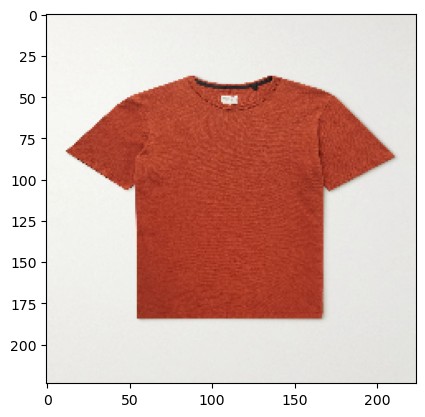

In [29]:
classes = np.array(df_updated.columns[1:])
proba = model.predict(pred_img.reshape(1,224,224,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(pred_img)


In [30]:
print(df_updated.columns[1:])

Index(['gender_male', 'isMarried_True', 'race_Muslim', 'race_Sinhala',
       'race_Tamil', 'religion_Buddhism', 'religion_Catholic',
       'religion_Hindu', 'religion_Islam'],
      dtype='object')


In [32]:
model.save('/kaggle/working/final.h5')